<a href="https://colab.research.google.com/github/yihan-zhou/fastai/blob/main/week5_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch, numpy as np, pandas as pd
from torch import tensor

In [6]:
# Adjust display to wider screen
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [7]:
path = "train.csv"

In [8]:
df = pd.read_csv(path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [14]:
df.fillna(modes, inplace=True)

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

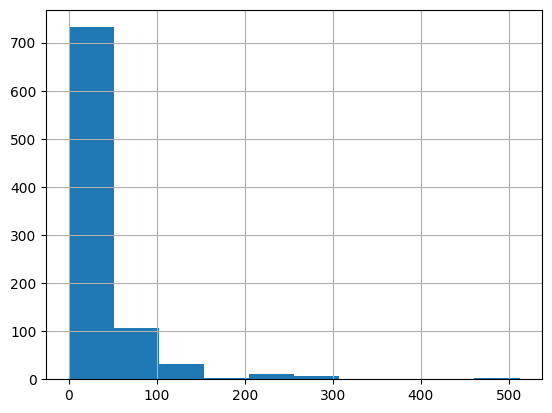

In [18]:
df.Fare.hist() # The majority of fare is less than 50 dollars.
# long tail distribution. Some models don't like long tail distribution, linear models are one of them, so as neural net.
# in this case, use log function, why?

<Axes: >

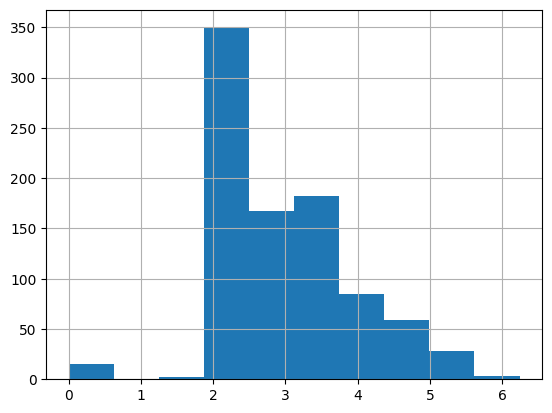

In [19]:
# log function changes really big number less big but don't really change small numbers
# See interactive graph here: https://www.geogebra.org/m/neA2Ajja#material/nVR73tRF
# log(0) is nan, useful trick is to do +1
# things like money or population, which grows exponentially, usually use log function
df["LogFare"] = np.log(df.Fare+1)
df.LogFare.hist()

In [20]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [21]:
 df.describe(include=[object]) # include=[object] will show the unique()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [22]:
df = pd.get_dummies(df, columns=["Sex", "Embarked", "Pclass"])
# get dummies change every categorical variable into a boolean column
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [23]:
added_cols = [ "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3" ]
df[added_cols].head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [24]:
# The categorical data encoding doesn't apply to the name column, at least not so straightforwardly.
# See this notebook for feature engineering the name column:
# https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818/notebook

In [25]:
t_dep = tensor(df.Survived)

In [26]:
indep_cols = ["Age", "SibSp", "Parch", "LogFare"] + added_cols
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [27]:
t_indep.shape

torch.Size([891, 12])

In [28]:
len(t_indep.shape) # called rank, it's the number of dimensions or axes that the tensor has

2

In [29]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1] # in this case, 12 -which is the number of columns
coeffs = torch.randn(n_coeff) - 0.5 # randn will provide from zero to one, minus 0.5 will give us a number in between
coeffs

tensor([-1.1635,  1.6909,  1.1907, -1.8283, -0.3960,  1.0108, -0.8941, -0.1175, -1.4742, -0.7084, -2.1337, -1.3082])

In [31]:
t_indep.shape, coeffs.shape

(torch.Size([891, 12]), torch.Size([12]))

In [41]:
tensor([1.1,2,3])*tensor(2) # demostration for broadcasting, concept comes from APL - notation coming from the 50s
# tensor([1.1,2,3])*tensor(2,2) # << this won't work

tensor([2.2000, 4.0000, 6.0000])

In [30]:
t_indep * coeffs

tensor([[-25.5964,   1.6909,   0.0000,  -3.8580,  -0.0000,   1.0108,  -0.0000,  -0.0000,  -1.4742,  -0.0000,  -0.0000,  -1.3082],
        [-44.2120,   1.6909,   0.0000,  -7.8260,  -0.3960,   0.0000,  -0.8941,  -0.0000,  -0.0000,  -0.7084,  -0.0000,  -0.0000],
        [-30.2503,   0.0000,   0.0000,  -4.0018,  -0.3960,   0.0000,  -0.0000,  -0.0000,  -1.4742,  -0.0000,  -0.0000,  -1.3082],
        [-40.7216,   1.6909,   0.0000,  -7.2963,  -0.3960,   0.0000,  -0.0000,  -0.0000,  -1.4742,  -0.7084,  -0.0000,  -0.0000],
        [-40.7216,   0.0000,   0.0000,  -4.0272,  -0.0000,   1.0108,  -0.0000,  -0.0000,  -1.4742,  -0.0000,  -0.0000,  -1.3082],
        [-27.9234,   0.0000,   0.0000,  -4.1079,  -0.0000,   1.0108,  -0.0000,  -0.1175,  -0.0000,  -0.0000,  -0.0000,  -1.3082],
        [-62.8276,   0.0000,   0.0000,  -7.2540,  -0.0000,   1.0108,  -0.0000,  -0.0000,  -1.4742,  -0.7084,  -0.0000,  -0.0000],
        ...,
        [-29.0868,   0.0000,   0.0000,  -3.8131,  -0.0000,   1.0108,  -0.0000

In [34]:
df[indep_cols].columns

Index(['Age', 'SibSp', 'Parch', 'LogFare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [37]:
# notice Age, the first column is much bigger than other columns
# it's not ideal, because 0.5 * Age means very different comparing to 0.5 * LogFair
# the solution is to divide the value with the maximum (one way of normalizing the values)
values, indices = t_indep.max(dim=0)
# it returns the value of the maximum, and the index of which that row is
# dim = 0 means getting the max over the rows, dim = 1 means getting the max of over the columns
values, indices

(tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000]),
 tensor([630, 159, 678, 258,   1,   0,   1,   5,   0,   1,   9,   0]))

In [39]:
# here we use broadcasting again
t_indep = t_indep/values
t_indep

tensor([[0.0034, 0.0156, 0.0000, 0.0542, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.0059, 0.0156, 0.0000, 0.1099, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0041, 0.0000, 0.0000, 0.0562, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.0055, 0.0156, 0.0000, 0.1025, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        [0.0055, 0.0000, 0.0000, 0.0566, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.0038, 0.0000, 0.0000, 0.0577, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0084, 0.0000, 0.0000, 0.1019, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        ...,
        [0.0039, 0.0000, 0.0000, 0.0535, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.0061, 0.0000, 0.1389, 0.0874, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0042, 0.0000, 0.0000, 

In [42]:
t_indep * coeffs
# this time much similar ranges than before

tensor([[-0.0040,  0.0264,  0.0000, -0.0991, -0.0000,  1.0108, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.0069,  0.0264,  0.0000, -0.2009, -0.3960,  0.0000, -0.8941, -0.0000, -0.0000, -0.7084, -0.0000, -0.0000],
        [-0.0047,  0.0000,  0.0000, -0.1027, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.0064,  0.0264,  0.0000, -0.1873, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.7084, -0.0000, -0.0000],
        [-0.0064,  0.0000,  0.0000, -0.1034, -0.0000,  1.0108, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.0044,  0.0000,  0.0000, -0.1055, -0.0000,  1.0108, -0.0000, -0.1175, -0.0000, -0.0000, -0.0000, -1.3082],
        [-0.0098,  0.0000,  0.0000, -0.1862, -0.0000,  1.0108, -0.0000, -0.0000, -1.4742, -0.7084, -0.0000, -0.0000],
        ...,
        [-0.0045,  0.0000,  0.0000, -0.0979, -0.0000,  1.0108, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.0071,  0.0000,  0.1654, -0.1598

In [ ]:
preds = (t_indep * coeffs).sum(axis=1) # adding them up for each row, give us the predictions
preds

In [44]:
len(preds) # a vextor of predictions for all the rows

891

In [47]:
loss = torch.abs(preds - t_dep).mean() # simple loss function, mean absolute value
loss

tensor(2.5675)

In [48]:
# hottip from Jeremy,
# do the code step by step manually and then copy paste them into a function
# maintain the working in progress in the notebook helps to clarify once coming back to it after long time
# E.g.

def calc_preds(t_indep, coeffs): return (t_indep * coeffs).sum(axis=1)
def calc_loss(t_indep, coeffs, t_dep): return torch.abs(calc_preds(t_indep, coeffs) - t_dep).mean()

# t_indep: tensor of the independent variables, the features
# t_dep: tensor of the dependent variables, the target

## Doing a gradient descent step

In [49]:
coeffs.requires_grad_()
# To turn on requires_grad, this got the coefficients for us
# this is "in-place operation", which will change the coeffs
# An in-place operation is an operation that changes directly the content of a given Tensor without making a copy.

tensor([-1.1635,  1.6909,  1.1907, -1.8283, -0.3960,  1.0108, -0.8941, -0.1175, -1.4742, -0.7084, -2.1337, -1.3082], requires_grad=True)

In [50]:
loss = calc_loss(t_indep, coeffs, t_dep)
loss

tensor(2.5675, grad_fn=<MeanBackward0>)

In [51]:
loss.backward()

In [52]:
coeffs.grad
# E.g. "-0.0044" indicates if we increase age, the loss will go down, which is desirable
# we subtract the coefficients times the learning rates

tensor([-0.0044, -0.0081, -0.0106, -0.0758, -0.3524, -0.6453, -0.1886, -0.0842, -0.7250, -0.2402, -0.2065, -0.5511])

In [54]:
# This is a context manager in PyTorch that temporarily sets all the gradients to zero.
# It's used here because the subsequent operations do not need to compute gradients,
# which can save memory and computations.

with torch.no_grad():
  coeffs.sub_(coeffs.grad * 0.1)
  print(calc_loss(t_indep, coeffs, t_dep))
# this is one step

tensor(2.4156)


## Training the linear model

In [55]:
from fastai.data.transforms import RandomSplitter

In [56]:
train_set, val_set = RandomSplitter(seed=42)(df)

In [58]:
train_set

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [59]:
val_set

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [61]:
t_indep.shape

torch.Size([891, 12])

In [64]:
# getting the tensor for both the independent variable set
# and then the dependent variable set
train_indep, val_indep = t_indep[train_set], t_indep[val_set]
train_dep, val_dep = t_dep[train_set], t_dep[val_set]
# another tip, just remember how to do something from one library and use it everywhere

In [65]:
def update_coeffs(coeffs, lr):return coeffs.sub_(coeffs.grad * lr)

In [67]:
def one_epoch(coeffs, lr):
  loss = calc_loss(t_indep, coeffs, t_dep)
  loss.backward()
  with torch.no_grad():update_coeffs(coeffs, lr)
  print(f"{loss: .3f}", end ="; ")

In [68]:
def init_coeff(): return (torch.randn(n_coeff) - 0.5).requires_grad_()

In [69]:
def train_model(epoch=30, lr = 0.01):
  torch.manual_seed(42)
  coeffs = init_coeff()
  for i in range(epoch): one_epoch(coeffs, lr)
  return coeffs

In [70]:
coeffs = train_model(18, 0.02) # this will print the loss for us in each step

 1.282;  1.259;  1.214;  1.146;  1.056;  0.970;  0.938;  0.904;  0.893;  0.881;  0.878;  0.886;  0.905;  0.917;  0.922;  0.920;  0.909;  0.905; 

In [72]:
def show_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False))) # coeffs.requires_grad_(False) is to turn off gradient computation
show_coeffs()

{'Age': tensor(-0.1576),
 'SibSp': tensor(-0.3579),
 'Parch': tensor(-0.2460),
 'LogFare': tensor(-0.1602),
 'Sex_female': tensor(-0.5904),
 'Sex_male': tensor(-0.4382),
 'Embarked_C': tensor(1.5971),
 'Embarked_Q': tensor(-0.8424),
 'Embarked_S': tensor(1.0578),
 'Pclass_1': tensor(0.2334),
 'Pclass_2': tensor(0.4246),
 'Pclass_3': tensor(0.7342)}

## Measuring accuracy

In [73]:
preds = calc_preds(coeffs, val_indep)

In [74]:
results = val_dep.bool()==(preds>0.5) # compare the actual in validation set with the prediction (any that is bigger than 0.5)
results[:10]

tensor([False,  True, False, False, False, False,  True,  True, False,  True])

In [75]:
results.float().mean()
# We are right about this % of the time..

tensor(0.4213)

In [78]:
# let's create an accuracy function
def acc(coeffs, val_indep, val_dep):
  model_performance_results = val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)
  return model_performance_results.float().mean()

In [79]:
acc(coeffs, val_indep, val_dep)

tensor(0.4213)

## Using sigmoid
Make the prediction within 0 and 1

In [80]:
preds[:10]

tensor([-1.0195, -0.5559,  1.8839,  1.0260,  1.0327,  1.0250,  1.7230,  0.8804,  1.2962,  1.7150])

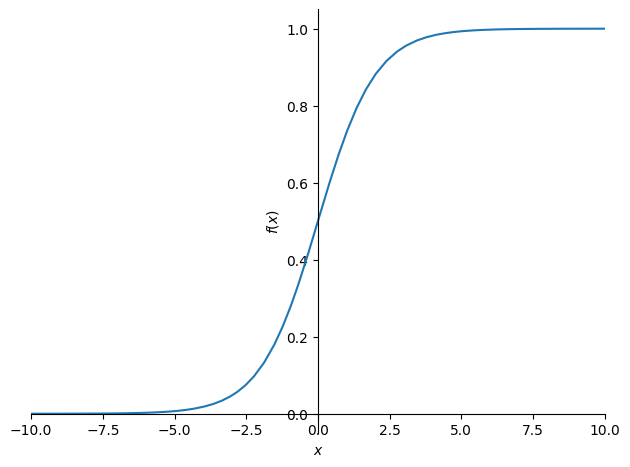

In [81]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim = (-10, 10))

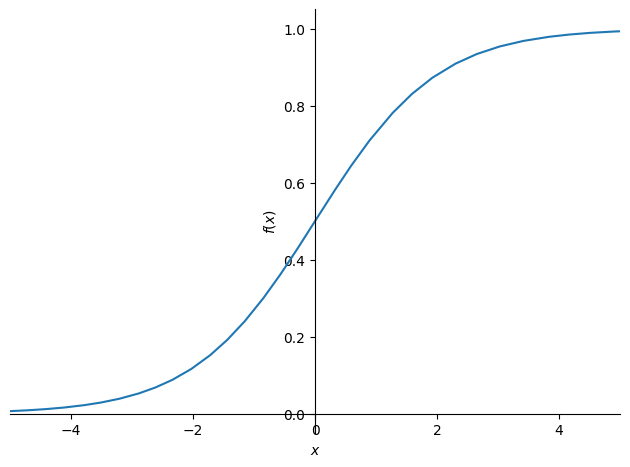

In [83]:
sympy.plot("1/(1+exp(-x))", xlim = (-5, 5))

In [84]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))

In [85]:
coeffs = train_model(lr=2)

 0.498;  0.466;  0.419;  0.379;  0.355;  0.340;  0.330;  0.322;  0.316;  0.309;  0.300;  0.289;  0.273;  0.255;  0.236;  0.221;  0.211;  0.206;  0.203;  0.201;  0.200;  0.200;  0.201;  0.202;  0.204;  0.206;  0.207;  0.208;  0.209;  0.210; 

In [86]:
acc(coeffs, val_indep, val_dep)

tensor(0.7921)

In [87]:
show_coeffs()

{'Age': tensor(-0.1690),
 'SibSp': tensor(-0.4022),
 'Parch': tensor(-0.1689),
 'LogFare': tensor(0.2399),
 'Sex_female': tensor(15.3200),
 'Sex_male': tensor(-17.4069),
 'Embarked_C': tensor(4.6099),
 'Embarked_Q': tensor(-0.5339),
 'Embarked_S': tensor(-3.3219),
 'Pclass_1': tensor(6.9353),
 'Pclass_2': tensor(3.2297),
 'Pclass_3': tensor(-9.8311)}

A general rule when you have a binary dependent variables, one to zero
The very last step would be chuck it through a sigmoid.